In [1]:
%load_ext autoreload


In [2]:
%autoreload 2

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
import pylab as plt
from scipy import stats
#%pylab inline

In [4]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2016-10-04/"
#path = "/Users/marf 1/Desktop/PhD Temp/2016-07-25/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 4920
files_end = 5026


In [5]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111", "Te" : "126", "Xe" : "129"}
#corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles2_mass_range
# 122/118 norm
#isotopes = [["111", "112", "113", "114", "115", "116", "117", "119", "120", "122", "124", "125"]]
#isotope_column = ["111", "112", "113", "114", "115", "116", "117", "119", "120", "122", "124", "125"]
#data_sample_column = [(i + "/" + "118") for i in isotope_column]
#denom_isotope = "118"
#norm_ratio = ["122","118"]
# 116/120 norm
isotopes = [["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "125"]]
isotope_column = ["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "125"]
data_sample_column = [(i + "/" + "120") for i in isotope_column]
denom_isotope = "120"
norm_ratio = ["116","120"]

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = True

In [8]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
#files_1 = range(4094, 4098, 1) + range(4099, 4172, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean" or sample_name == "Teflon blk":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(4544)
df_all

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2016-10-04 20:30:00,1,blank sol,0.001586,0.001215,0.010850,0.002192,0.006126,0.001921,0.003640,0.000118,...,0.000042,4.588720e-05,0.001504,4.817690e-05,0.001178,0.000028,0.010235,0.002049,0.005779,0.001815
2016-10-04 20:30:00,2,blank sol,0.001541,0.001180,0.010475,0.002099,0.005889,0.001839,0.003531,0.000072,...,0.000034,1.446310e-05,0.001324,1.083840e-05,0.001048,0.000030,0.009248,0.001837,0.005068,0.001590
2016-10-04 20:30:00,3,blank sol,0.001424,0.001074,0.009898,0.001918,0.005437,0.001709,0.003237,0.000079,...,0.000045,2.518230e-05,0.001360,7.253100e-06,0.001079,0.000038,0.009687,0.001868,0.005312,0.001661
2016-10-04 20:30:00,4,blank sol,0.001331,0.001003,0.009258,0.001765,0.005003,0.001587,0.002972,0.000075,...,0.000049,3.375850e-05,0.001483,2.161970e-05,0.001125,0.000052,0.010032,0.001992,0.005628,0.001732
2016-10-04 20:30:00,5,blank sol,0.001429,0.001084,0.009816,0.001949,0.005453,0.001699,0.003238,0.000061,...,0.000040,2.325800e-06,0.001467,-6.457000e-07,0.001155,0.000017,0.010118,0.002062,0.005658,0.001772
2016-10-04 20:30:00,6,blank sol,0.001343,0.001020,0.009232,0.001795,0.005019,0.001574,0.003034,0.000079,...,0.000047,8.759300e-06,0.001303,4.531550e-05,0.001006,0.000036,0.009032,0.001780,0.004901,0.001504
2016-10-04 20:30:00,7,blank sol,0.001472,0.001143,0.010091,0.002004,0.005641,0.001735,0.003382,0.000109,...,0.000025,-3.390500e-06,0.001414,3.741050e-05,0.001055,0.000017,0.009669,0.001899,0.005360,0.001684
2016-10-04 20:30:00,8,blank sol,0.001346,0.001035,0.009411,0.001850,0.005169,0.001599,0.003104,0.000092,...,0.000038,7.329100e-06,0.001290,2.305340e-05,0.000972,0.000025,0.008998,0.001772,0.004834,0.001549
2016-10-04 20:30:00,9,blank sol,0.001381,0.001022,0.009519,0.001837,0.005189,0.001615,0.003112,0.000095,...,0.000045,-1.338450e-05,0.001223,1.012800e-05,0.000931,0.000026,0.008630,0.001644,0.004624,0.001442


In [9]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        #df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        #df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.raw_ratios_corr(denom_isotope)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [10]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_internal_sub["Cd/Sn"] = (df_internal_norm["111"]/12.722)/(df_internal_norm["118"]/24.223)
df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)
#df_internal_sub["Te/Sn"] = (df_internal_norm["126"]/18.952)/(df_internal_norm["118"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [11]:
df_internal_norm

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,114,117,116,111,125,113,112,124,119,118
date,,,,,,,,,,,,,,,,,,,,,
2016-10-04 20:41:00,NaN,NaN,-2.327566e-07,NaN,0.010355,0.446,0.235323,0.742975,0.263492,0.142100,...,0.458407,5.570433,10.412143,NaN,NaN,NaN,0.658043,4.617298,6.410065,17.829984
2016-10-04 20:41:00,1.079842e-06,0.029826,9.175741e-08,0.020192,0.010356,0.446,0.235324,0.742987,0.263491,0.142101,...,0.454077,5.517415,10.313241,0.000023,NaN,0.000025,0.651859,4.572540,6.348818,17.660204
2016-10-04 20:41:00,6.154421e-07,0.029822,2.198042e-06,0.020193,0.010358,0.446,0.235315,0.742978,0.263493,0.142107,...,0.460040,5.589711,10.448651,0.000013,0.000214,0.000062,0.660308,4.633530,6.432380,17.892167
2016-10-04 20:41:00,1.191564e-06,0.029823,1.325386e-06,0.020190,0.010357,0.446,0.235325,0.742989,0.263487,0.142108,...,0.448459,5.450015,10.186980,0.000025,0.000208,0.000054,0.643780,4.517554,6.271349,17.444709
2016-10-04 20:41:00,4.586507e-07,0.029825,3.912244e-06,0.020195,0.010358,0.446,0.235324,0.742964,0.263485,0.142105,...,0.443978,5.393726,10.082396,0.000010,0.000205,0.000094,0.637326,4.469044,6.205891,17.263126
2016-10-04 20:41:00,1.262383e-06,0.029823,2.258844e-06,0.020192,0.010359,0.446,0.235322,0.742973,0.263491,0.142108,...,0.449746,5.465018,10.215129,0.000027,0.000216,0.000076,0.645538,4.530169,6.288847,17.492679
2016-10-04 20:41:00,2.094104e-06,0.029825,1.627313e-06,0.020188,0.010356,0.446,0.235327,0.742975,0.263484,0.142098,...,0.446919,5.430267,10.150613,0.000044,0.000203,0.000078,0.641705,4.498982,6.247793,17.380063
2016-10-04 20:41:00,1.567219e-06,0.029821,2.799713e-06,0.020190,0.010359,0.446,0.235316,0.742974,0.263480,0.142103,...,0.445540,5.413450,10.119435,0.000033,0.000210,0.000093,0.639589,4.486161,6.228902,17.327371
2016-10-04 20:41:00,1.239301e-06,0.029823,2.371164e-06,0.020192,0.010360,NaN,0.235320,0.742973,0.263481,0.142108,...,0.444309,5.398380,10.090999,0.000026,0.000220,0.000077,0.637784,4.474131,6.211553,17.278930


In [12]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SD2])
df_internal_norm_mean["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
#df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:8]
df_internal_norm_mean
#epsilon = epsilon.drop(["118"], axis = 1)
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,117,118,119,120,122,124,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2016-10-04 20:41:00,0.000002,0.029823,1.537584e-06,0.020190,0.010359,0.446,0.235320,0.742970,0.263486,0.142103,...,5.604971,17.940592,6.449723,24.810588,3.620964,4.645901,0.000211,0.000004,0.000041,NIST 200ppb
2016-10-04 21:06:00,0.000002,0.029823,7.134884e-07,0.020189,0.010360,0.446,0.235321,0.742955,0.263482,0.142106,...,10.318065,33.024239,11.871890,45.667179,6.664397,8.549870,0.000382,0.000006,0.000040,NIST 350ppb
2016-10-04 21:32:00,0.000003,0.029824,9.228903e-07,0.020190,0.010362,0.446,0.235316,0.742960,0.263476,0.142104,...,5.457459,17.468803,6.280064,24.159316,3.510552,4.504203,0.000205,0.000007,0.000040,NIST 200ppb
2016-10-04 21:46:00,0.000003,0.029821,6.738186e-07,0.020188,0.010361,0.446,0.235317,0.742960,0.263472,0.142102,...,5.510746,17.638701,6.340883,24.392632,3.559803,4.567162,0.000204,0.000008,0.000040,NIST 200ppb
2016-10-04 22:01:00,0.000003,0.029823,7.719885e-07,0.020189,0.010360,0.446,0.235317,0.742960,0.263472,0.142103,...,5.384043,17.232380,6.194542,23.828825,3.477270,4.460867,0.000200,0.000007,0.000040,NIST 200ppb
2016-10-04 22:16:00,0.000003,0.029822,7.226355e-07,0.020189,0.010360,0.446,0.235315,0.742939,0.263476,0.142105,...,10.090526,32.294338,11.608890,44.653892,6.515802,8.358385,0.000385,0.000006,0.000041,NIST 350ppb
2016-10-04 22:30:00,0.000003,0.029824,2.934236e-07,0.020190,0.010361,0.446,0.235315,0.742955,0.263468,0.142100,...,5.387230,17.242819,6.198285,23.843808,3.479447,4.463659,0.000205,0.000007,0.000041,NIST 200ppb
2016-10-04 22:56:00,0.000003,0.029823,1.965268e-07,0.020189,0.010362,0.446,0.235317,0.742940,0.263470,0.142102,...,5.263945,16.848113,6.056677,23.299199,3.400136,4.362212,0.000212,0.000008,0.000042,NIST 200ppb
2016-10-04 23:11:00,0.000003,0.029823,-6.971342e-07,0.020189,0.010361,0.446,0.235317,0.742954,0.263473,0.142103,...,5.320367,17.028966,6.121640,23.549011,3.436603,4.408896,0.000180,0.000008,0.000036,NIST 200ppb


In [13]:
df_internal_norm_sample_sd = df_internal_norm_mean.groupby(df_internal_norm_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

111/120                 112/120  \
                                     mean           SD2      mean   
sample                                                              
NIST + Cd ns 1 Sn TRU wash       0.000008  0.000000e+00  0.029823   
NIST 1000 ng Sn TRU PRE          0.000003  5.306825e-07  0.029823   
NIST 1000 ng Sn TRU bf. PRE      0.000003  7.904612e-08  0.029823   
NIST 150 ng Sn TRU               0.000003  0.000000e+00  0.029823   
NIST 200ppb                      0.000003  7.870843e-07  0.029824   
NIST 350ppb                      0.000003  4.151877e-07  0.029824   
NIST 500 ng Sn TRU               0.000003  0.000000e+00  0.029824   
ZH09-05 44.8_1_2 Sn TRU PRE      0.000004  0.000000e+00  0.029824   
ZH09-05 44.8_1_2 Sn TRU bf. PRE  0.000003  0.000000e+00  0.029823   

                                                    113/120                \
                                          SD2          mean           SD2   
sample                                                                      
NIST + Cd ns 1 Sn TRU wash       0.000000e+00 -1.344761e-07  0.000000e+00   
NIST 1000 ng Sn TRU PRE          1.214350e-06 -6.524215e-08  4.222788e-07   
NIST 1000 ng Sn TRU bf. PRE      6.001395e-08  2.771050e-07  5.605115e-07   
NIST 150 ng Sn TRU               0.000000e+00  1.683579e-06  0.000000e+00   
NIST 200ppb                      2.860196e-06  2.975938e-07  1.206434e-06   
NIST 350ppb                      2.070756e-06  5.109083e-07  6.454669e-07   
NIST 500 ng Sn TRU               0.000000e+00  4.340673e-07  0.000000e+00   
ZH09-05 44.8_1_2 Sn TRU PRE      0.000000e+00  9.346392e-07  0.000000e+00   
ZH09-05 44.8_1_2 Sn TRU bf. PRE  0.000000e+00  3.899922e-07  0.000000e+00   

                                  114/120                 115/120  \
                                     mean           SD2      mean   
sample                                                              
NIST + Cd ns 1 Sn TRU wash       0.020191  0.000000e+00  0.010360   
NIST 1000 ng Sn TRU PRE          0.020190  8.511608e-07  0.010360   
NIST 1000 ng Sn TRU bf. PRE      0.020190  3.577512e-07  0.010360   
NIST 150 ng Sn TRU               0.020192  0.000000e+00  0.010361   
NIST 200ppb                      0.020190  2.364733e-06  0.010361   
NIST 350ppb                      0.020190  1.643347e-06  0.010361   
NIST 500 ng Sn TRU               0.020191  0.000000e+00  0.010360   
ZH09-05 44.8_1_2 Sn TRU PRE      0.020191  0.000000e+00  0.010359   
ZH09-05 44.8_1_2 Sn TRU bf. PRE  0.020191  0.000000e+00  0.010359   

                                                 ...          122            \
                                          SD2    ...         mean       SD2   
sample                                           ...                          
NIST + Cd ns 1 Sn TRU wash       0.000000e+00    ...     4.369375  0.000000   
NIST 1000 ng Sn TRU PRE          7.681367e-07    ...     3.288522  0.086088   
NIST 1000 ng Sn TRU bf. PRE      7.404740e-07    ...     3.365694  0.589361   
NIST 150 ng Sn TRU               0.000000e+00    ...     3.246218  0.000000   
NIST 200ppb                      1.427827e-06    ...     3.236229  0.257245   
NIST 350ppb                      7.701439e-07    ...     6.206478  0.493543   
NIST 500 ng Sn TRU               0.000000e+00    ...     4.614426  0.000000   
ZH09-05 44.8_1_2 Sn TRU PRE      0.000000e+00    ...     3.144792  0.000000   
ZH09-05 44.8_1_2 Sn TRU bf. PRE  0.000000e+00    ...     3.652624  0.000000   

                                      124                 125            \
                                     mean       SD2      mean       SD2   
sample                                                                    
NIST + Cd ns 1 Sn TRU wash       5.600630  0.000000  0.000277  0.000000   
NIST 1000 ng Sn TRU PRE          4.215295  0.110593  0.000207  0.000011   
NIST 1000 ng Sn TRU bf. PRE      4.314064  0.755271  0.000202  0.000022   
NIST 150 ng Sn TRU               4.160853  0.000000 

In [14]:
df_internal_norm_mean.describe()


,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,116,117,118,119,120,122,124,125,Cd/Sn,Te/Sn
count,8.200000e+01,82.000000,8.200000e+01,82.000000,8.200000e+01,8.200000e+01,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,3.082656e-06,0.029824,3.442557e-07,0.020190,1.036072e-02,4.460000e-01,0.235314,0.742945,0.263469,0.142099,...,10.853688,5.805209,18.577411,6.677065,25.681668,3.746266,4.804314,0.000221,0.000007,0.000041
std,7.089059e-07,0.000001,5.735991e-07,0.000001,7.217833e-07,3.672365e-16,0.000002,0.000008,0.000005,0.000004,...,3.196051,1.709782,5.471947,1.967005,7.565813,1.104008,1.416263,0.000065,0.000002,0.000002
min,1.847174e-06,0.029821,-8.620538e-07,0.020187,1.035860e-02,4.460000e-01,0.235309,0.742925,0.263460,0.142091,...,8.810962,4.711628,15.075151,5.417175,20.832196,3.037733,3.894289,0.000163,0.000004,0.000035
25%,2.772763e-06,0.029823,7.838400e-10,0.020190,1.036029e-02,4.460000e-01,0.235312,0.742940,0.263464,0.142095,...,9.192355,4.915896,15.729518,5.652645,21.760238,3.173519,4.068601,0.000186,0.000006,0.000039
50%,2.989357e-06,0.029824,3.597781e-07,0.020190,1.036071e-02,4.460000e-01,0.235314,0.742945,0.263468,0.142098,...,9.381237,5.019454,16.069004,5.777758,22.230478,3.245076,4.160426,0.000195,0.000007,0.000041
75%,3.287148e-06,0.029825,7.058181e-07,0.020191,1.036120e-02,4.460000e-01,0.235315,0.742948,0.263472,0.142102,...,10.069117,5.386433,17.240209,6.197349,23.840062,3.478903,4.462961,0.000208,0.000008,0.000043
max,8.415260e-06,0.029828,1.769690e-06,0.020193,1.036276e-02,4.460000e-01,0.235321,0.742970,0.263486,0.142106,...,19.345662,10.349546,33.126810,11.909425,45.816274,6.686885,8.579825,0.000390,0.000019,0.000046


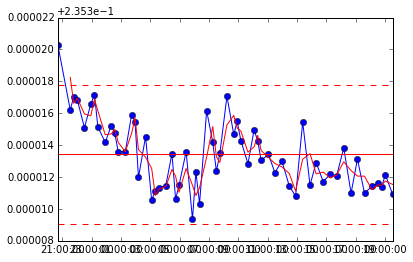

In [15]:
# variation of standard data + mean + 2SD
sel_ratio = "117/120"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

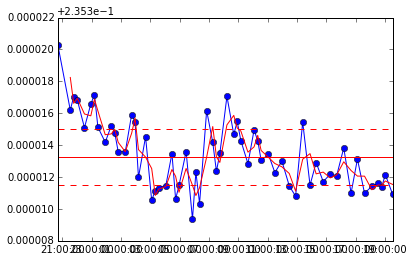

In [16]:
# variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "117/120"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].median(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].quantile(0.25), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].quantile(0.75), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

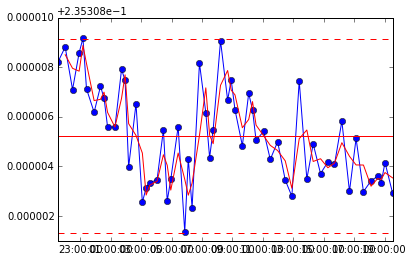

In [17]:
# outlier corr variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "117/120"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = new_corr.mad_outlier_rejection(plot_Nist.drop("sample", axis=1))
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [18]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 200ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 1]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
std_mean = corr_values[(corr_values["sample"] == "NIST 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new / ((new.shift(2) + new.shift(-2))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
epsilon_NIST= epsilon_NIST[epsilon_NIST["sample"] != "NIST 200ppb"]
epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 200ppb"]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=True)
epsilon_comp

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,117,118,119,120,122,124,125,Cd/Sn,Te/Sn,sample
0,-20.898330,-0.249099,-4200.398409,-0.252611,-0.121181,0.000000e+00,0.129596,-0.142456,0.029699,0.157621,...,8654.247570,8652.811027,8652.143093,8651.120416,8689.985970,8688.029912,8347.866971,-105.342939,-158.746781,NIST 350ppb
1,-1073.697710,-0.501479,3565.370814,-0.348415,-0.366902,-1.110223e-12,-0.042803,-0.248132,0.225455,0.276771,...,8735.995042,8734.822668,8734.854085,8733.554259,8732.402585,8731.266981,8980.021760,-1234.141234,78.697012,NIST 350ppb
2,-2830.602930,0.049968,50947.983154,0.645806,-0.259988,-1.110223e-12,-0.017579,-0.260587,-0.092643,0.170816,...,9580.881390,9580.981631,9581.909746,9582.668588,9584.128608,9585.623059,8297.422305,-2775.337041,-636.770968,NIST 350ppb
3,-1105.612264,-0.259319,4760.251341,-0.089311,-0.858038,0.000000e+00,0.076580,-0.073733,0.194419,0.235334,...,8838.788687,8837.855092,8837.646676,8836.606035,8835.678724,8834.550093,10766.324344,-979.403019,1093.966125,NIST 350ppb
4,-29.606803,-0.182599,16532.553019,-0.010170,-0.142766,2.220446e-12,0.113167,0.003664,0.056755,0.206862,...,8833.962107,8832.906309,8832.217940,8831.272809,8830.042739,8828.464615,9110.400823,-190.562067,150.250026,NIST 350ppb
5,-943.546713,0.196820,-12452.924673,0.061197,0.141667,0.000000e+00,0.015149,-0.075020,-0.112801,0.189910,...,9039.124943,9038.584162,9038.184017,9038.069944,9037.870625,9037.318857,8853.941310,-942.264660,-79.176860,NIST 350ppb
6,-1156.419097,-0.241149,-31314.863333,-0.018543,-0.287682,-1.110223e-12,0.012535,-0.081417,0.039770,0.372811,...,8920.346013,8920.029153,8920.086817,8919.839965,8920.204095,8919.998784,7353.636178,-1155.891805,-828.675461,NIST 350ppb
7,-427.493625,-0.748001,6251.579675,-0.469019,-0.291943,-1.110223e-12,0.131920,0.057591,0.075320,0.239508,...,9134.600851,9129.113231,9123.816994,9118.518030,9108.701093,9098.246210,9821.147149,-492.130229,386.287073,NIST 350ppb
8,-2715.170186,-0.123520,-55147.996087,0.644228,-0.341177,2.220446e-12,-0.068941,0.027808,0.184779,0.148107,...,8878.809424,8878.810286,8878.923655,8878.392072,8878.317652,8878.200253,9354.033433,-2714.895650,261.485369,NIST 350ppb
9,173.640676,-0.173043,-7942.582991,0.227670,-0.243060,0.000000e+00,0.013064,-0.082264,0.053897,0.253265,...,9082.823771,9082.321601,9082.165496,9081.702596,9081.462322,9080.929969,8044.548886,535.801941,-543.138576,NIST 350ppb


In [19]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon_comp.drop(["111", "125", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

111/120          112/120         113/120  \
                                     mean      SD2    mean   SD2      mean   
sample                                                                       
NIST + Cd ns 1 Sn TRU wash       17727.67     0.00   -0.07  0.00  -2489.00   
NIST 1000 ng Sn TRU PRE            209.89   219.45   -0.23  0.30 -10178.23   
NIST 1000 ng Sn TRU bf. PRE        145.47  1339.41    0.01  0.45  -2883.69   
NIST 150 ng Sn TRU               -1870.94     0.00    0.09  0.00 -62754.50   
NIST 200ppb                        221.80  3143.17    0.05  0.81  -3255.22   
NIST 350ppb                       -937.66  1773.42   -0.24  0.45  -3605.42   
NIST 500 ng Sn TRU                -841.00     0.00    0.14  0.00 -34951.80   
ZH09-05 44.8_1_2 Sn TRU PRE        662.31     0.00    0.21  0.00    528.41   
ZH09-05 44.8_1_2 Sn TRU bf. PRE  -1909.85     0.00    0.49  0.00 -29838.79   

                                          114/120       115/120        \
                                      SD2    mean   SD2    mean   SD2   
sample                                                                  
NIST + Cd ns 1 Sn TRU wash           0.00   -0.48  0.00   -1.92  0.00   
NIST 1000 ng Sn TRU PRE           5551.67   -0.18  0.27   -0.25  1.08   
NIST 1000 ng Sn TRU bf. PRE      14387.44    0.06  0.71   -1.10  0.87   
NIST 150 ng Sn TRU                   0.00    0.54  0.00    0.10  0.00   
NIST 200ppb                      67079.10   -0.02  1.09    0.12  1.50   
NIST 350ppb                      47477.30    0.03  0.70   -0.34  0.72   
NIST 500 ng Sn TRU                   0.00    0.48  0.00   -0.51  0.00   
ZH09-05 44.8_1_2 Sn TRU PRE          0.00    0.52  0.00   -1.20  0.00   
ZH09-05 44.8_1_2 Sn TRU bf. PRE      0.00    1.44  0.00   -1.48  0.00   

                                  ...    119/120       122/120       124/120  \
                                  ...       mean   SD2    mean   SD2    mean   
sample                            ...                                          
NIST + Cd ns 1 Sn TRU wash        ...       0.12  0.00    0.29  0.00    0.26   
NIST 1000 ng Sn TRU PRE           ...       0.02  0.01   -0.03  0.13   -0.04   
NIST 1000 ng Sn TRU bf. PRE       ...       0.01  0.06    0.00  0.00    0.12   
NIST 150 ng Sn TRU                ...       0.03  0.00   -0.01  0.00    0.19   
NIST 200ppb                       ...      -0.03  0.21   -0.04  0.24   -0.06   
NIST 350ppb                       ...       0.10  0.25    0.26  0.17    0.33   
NIST 500 ng Sn TRU                ...       0.20  0.00    0.20  0.00    0.10   
ZH09-05 44.8_1_2 Sn TRU PRE       ...      -0.15  0.00    0.03  0.00   -0.34   
ZH09-05 44.8_1_2 Sn TRU bf. PRE   ...      -0.08  0.00   -0.13  0.00   -0.26   

                                      125/120                113           
                                  SD2    mean      SD2      mean      SD2  
sample                                                                     
NIST + Cd ns 1 Sn TRU wash       0.00 -239.97     0.00  29055.00     0.00  
NIST 1000 ng Sn TRU PRE          0.12  657.86  1291.82  -1584.13  2044.78  
NIST 1000 ng Sn TRU bf. PRE      0.09  162.30   544.42    381.45  1700.42  
NIST 150 ng Sn TRU               0.00  -91.82     0.00   5394.00     0.00  
NIST 200ppb                      0.29  -13.36  1225.40  -1228.76  4532.66  
NIST 350ppb                      0.28  -20.34   968.61   8744.26  4348.12  
NIST 500 ng Sn TRU               0.00  -31.33     0.00   7301.31     0.00  
ZH09-05 44.8_1_2 Sn TRU PRE      0.00  982.12     0.00    246.56     0.00  
ZH09-05 44.8_1_2 Sn TRU bf. PRE  0.00 -201.59     0.00    552.90     0.00  

[9 rows x 26 columns]

In [20]:
epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"]["118/120"].mean()

0.00889764110076065

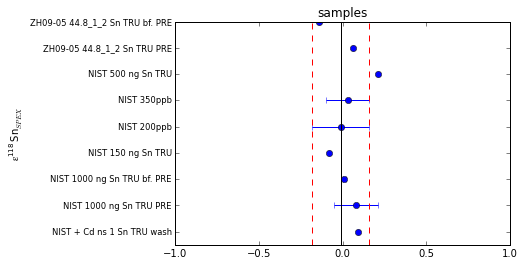

In [26]:
sel_ratio = "117/120"
x = range(1, len(epsilon_sum.index)+1)
plt.errorbar(epsilon_sum[sel_ratio]["mean"], x, xerr = epsilon_sum[sel_ratio]["SD2"], ls='none', marker="o")
plt.title("samples")
plt.xlim([-1, 1])
plt.ylim([0.5, 3.0])
plt.yticks(x, epsilon_sum.index, size='small', rotation=0)
plt.axvline(epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].mean(), color='k', linestyle='-')
plt.axvline(epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].mean()+ 2*epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].std(), color='r', linestyle='--')
plt.axvline(epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].mean()- 2*epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"][sel_ratio].std(), color='r', linestyle='--')
#plt.axvline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.ylabel(r'$\mathregular{\epsilon^{118}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

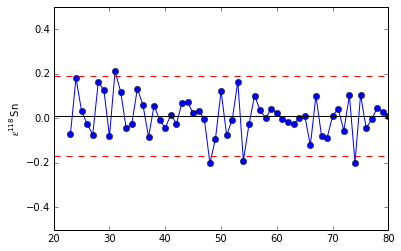

In [22]:
sel_ratio = "118/120"
epsilon_comp = epsilon_comp[epsilon_comp["sample"] == "NIST 200ppb"]
x = range(min(epsilon_comp.index.tolist()), max(epsilon_comp.index.tolist())+1)
plt.plot(x, epsilon_comp[sel_ratio], marker="o")
plt.ylim([-0.5, 0.5])
#plt.xticks(x, epsilon_comp["sample"], size='small', rotation=90)
plt.axhline(epsilon_comp[sel_ratio].mean(), color='k', linestyle='-')
plt.axhline(epsilon_comp[sel_ratio].mean()+ 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(epsilon_comp[sel_ratio].mean()- 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [13]:
df_all.to_csv(path + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='a', header=False)

In [60]:
df_internal_norm.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_116_120_bdg_corr_with_outlier_rej_all.csv", mode='w', header=True)

In [45]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_raw_ratios_116_120_bdg_corr.csv", mode='w', header=True)

In [103]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

NameError: name 'df_std' is not defined

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [30]:
#old Cd/Sn & Te/Sn extraction - doesn't include bgd corr
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
